In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
import pandas as pd

In [2]:
#1
df = pd.read_csv("hurricane_data_after2000.csv")
df

,Unnamed: 0,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,567567,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 03:00:00,TS,-12.7476,48.4301,NaN,NaN
1,567568,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 06:00:00,TS,-12.7333,47.9000,25.0,1000.0
2,567569,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 09:00:00,TS,-12.6807,47.5150,NaN,NaN
3,567570,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 12:00:00,TS,-12.6333,47.2000,25.0,1000.0
4,567571,1999357S08076,2000,105,SI,MM,ASTRIDE,2000-01-01 15:00:00,TS,-12.6183,46.8858,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145102,712669,2023226N09270,2023,40,EP,MM,HILARY,2023-08-16 12:00:00,TS,12.5333,-102.3330,NaN,NaN
145103,712670,2023226N09270,2023,40,EP,MM,HILARY,2023-08-16 15:00:00,TS,12.8590,-102.8870,NaN,NaN
145104,712671,2023226N09270,2023,40,EP,MM,HILARY,2023-08-16 18:00:00,TS,13.2667,-103.3330,NaN,NaN
145105,712672,2023226N09270,2023,40,EP,MM,HILARY,2023-08-16 21:00:00,TS,13.1848,-103.9340,NaN,NaN


In [3]:
#2
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])
df.set_index('ISO_TIME',inplace=True)
df

,Unnamed: 0,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
ISO_TIME,,,,,,,,,,,,
2000-01-01 03:00:00,567567,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.7476,48.4301,NaN,NaN
2000-01-01 06:00:00,567568,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.7333,47.9000,25.0,1000.0
2000-01-01 09:00:00,567569,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6807,47.5150,NaN,NaN
2000-01-01 12:00:00,567570,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6333,47.2000,25.0,1000.0
2000-01-01 15:00:00,567571,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6183,46.8858,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-16 12:00:00,712669,2023226N09270,2023,40,EP,MM,HILARY,TS,12.5333,-102.3330,NaN,NaN
2023-08-16 15:00:00,712670,2023226N09270,2023,40,EP,MM,HILARY,TS,12.8590,-102.8870,NaN,NaN
2023-08-16 18:00:00,712671,2023226N09270,2023,40,EP,MM,HILARY,TS,13.2667,-103.3330,NaN,NaN


In [4]:
#3
un_bas = df['BASIN'].unique()
un_sub = df['SUBBASIN'].unique()
un_nat = df['NATURE'].unique()
print("Unique values of BASIN: ", un_bas)
print("Unique values of SUBBASIN: ", un_sub)
print("Unique values of NATURE: ", un_nat)

Unique values of BASIN:  ['SI' 'SP' 'NI' 'WP' 'EP' nan 'SA']
Unique values of SUBBASIN:  ['MM' 'WA' 'EA' 'BB' 'CP' 'GM' nan 'CS' 'AS']
Unique values of NATURE:  ['TS' 'NR' 'ET' 'MX' 'SS' 'DS']


In [5]:
#4
df.rename(columns={'WMO_WIND':'WIND', 'WMO_PRES':'PRES'},inplace=True)
df

,Unnamed: 0,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,,
2000-01-01 03:00:00,567567,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.7476,48.4301,NaN,NaN
2000-01-01 06:00:00,567568,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.7333,47.9000,25.0,1000.0
2000-01-01 09:00:00,567569,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6807,47.5150,NaN,NaN
2000-01-01 12:00:00,567570,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6333,47.2000,25.0,1000.0
2000-01-01 15:00:00,567571,1999357S08076,2000,105,SI,MM,ASTRIDE,TS,-12.6183,46.8858,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-16 12:00:00,712669,2023226N09270,2023,40,EP,MM,HILARY,TS,12.5333,-102.3330,NaN,NaN
2023-08-16 15:00:00,712670,2023226N09270,2023,40,EP,MM,HILARY,TS,12.8590,-102.8870,NaN,NaN
2023-08-16 18:00:00,712671,2023226N09270,2023,40,EP,MM,HILARY,TS,13.2667,-103.3330,NaN,NaN


In [6]:
#5
ten_wind = df.nlargest(10, 'WIND')
print(ten_wind)

                     Unnamed: 0            SID  SEASON  NUMBER BASIN SUBBASIN  \
ISO_TIME                                                                        
2015-10-23 12:00:00      666142  2015293N13266    2015      96    EP       MM   
2015-10-23 06:00:00      666140  2015293N13266    2015      96    EP       MM   
2015-10-23 18:00:00      666144  2015293N13266    2015      96    EP       MM   
2005-10-19 12:00:00      605764  2005289N18282    2005      97   NaN       CS   
2019-09-01 16:40:00      689870  2019236N10314    2019      52   NaN      NaN   
2019-09-01 18:00:00      689871  2019236N10314    2019      52   NaN      NaN   
2005-09-22 03:00:00      604999  2005261N21290    2005      80   NaN       GM   
2005-09-22 06:00:00      605000  2005261N21290    2005      80   NaN       GM   
2009-10-18 06:00:00      629245  2009288N07267    2009      82    EP       MM   
2009-10-18 12:00:00      629247  2009288N07267    2009      82    EP       MM   

                         NA

In [9]:
#6
## MM Comment: Needed to use grouping to group by SID (-0.25)
## Something like:
gb = df.groupby('SID') 
gb.WIND.max().nlargest(10)

## Lea's original code:
#sid = ten_wind['SID']
sid = ten_wind['SID']
#.reset_index(drop=True)
print(sid)

ISO_TIME
2015-10-23 12:00:00    2015293N13266
2015-10-23 06:00:00    2015293N13266
2015-10-23 18:00:00    2015293N13266
2005-10-19 12:00:00    2005289N18282
2019-09-01 16:40:00    2019236N10314
2019-09-01 18:00:00    2019236N10314
2005-09-22 03:00:00    2005261N21290
2005-09-22 06:00:00    2005261N21290
2009-10-18 06:00:00    2009288N07267
2009-10-18 12:00:00    2009288N07267
Name: SID, dtype: object


<Axes: title={'center': '20 Strongest-Wind Hurricanes'}, xlabel='Time Stamps', ylabel='Wind Speeds'>

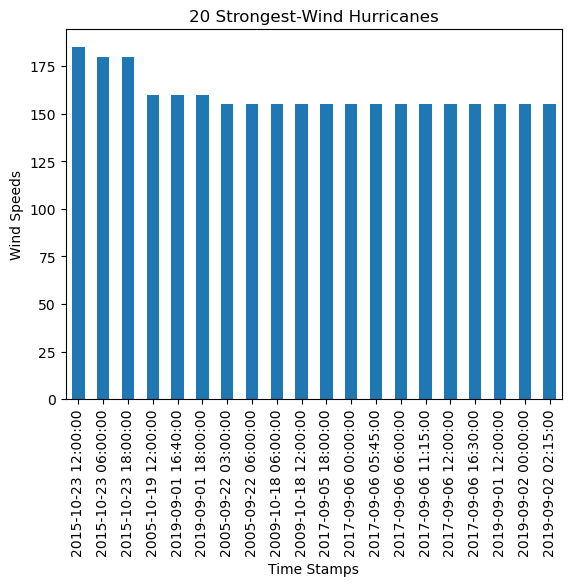

In [309]:
#7
twenty_wind = df.nlargest(20, 'WIND')
winds = twenty_wind['WIND']
winds.plot(kind='bar',xlabel='Time Stamps',ylabel='Wind Speeds',title='20 Strongest-Wind Hurricanes')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'WP'),
  Text(1, 0, 'SI'),
  Text(2, 0, 'EP'),
  Text(3, 0, 'SP'),
  Text(4, 0, 'NI'),
  Text(5, 0, 'SA')])

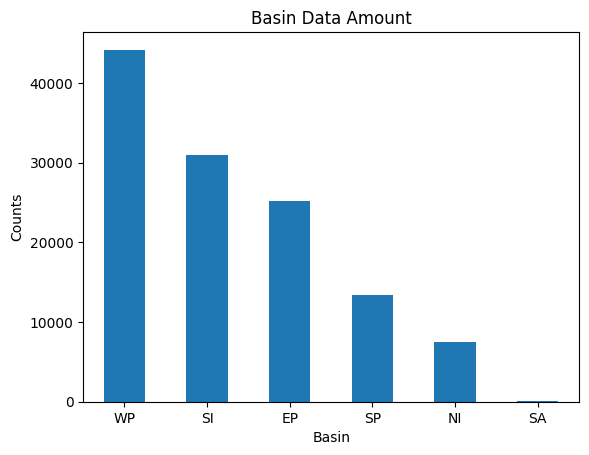

In [10]:
#8
bas_cnt = df['BASIN'].value_counts()
bas_cnt.plot(kind='bar',xlabel='Basin',ylabel='Counts',title='Basin Data Amount')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'EP'),
  Text(1, 0, 'NI'),
  Text(2, 0, 'SA'),
  Text(3, 0, 'SI'),
  Text(4, 0, 'SP'),
  Text(5, 0, 'WP')])

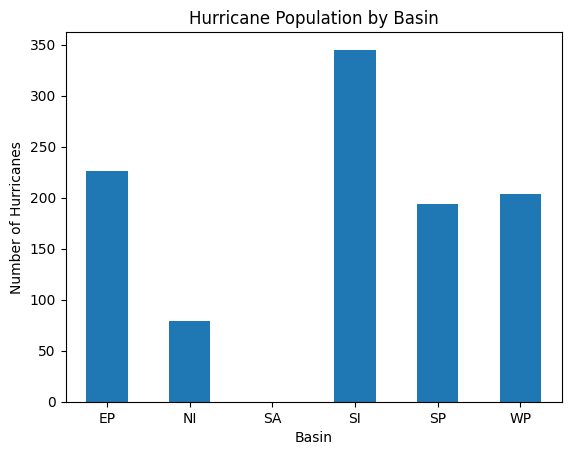

In [11]:
#9
un_hur_cnt = df.groupby('BASIN')['NAME'].nunique()
un_hur_cnt.plot(kind='bar',xlabel='Basin',ylabel='Number of Hurricanes',title='Hurricane Population by Basin')
plt.xticks(rotation=0)

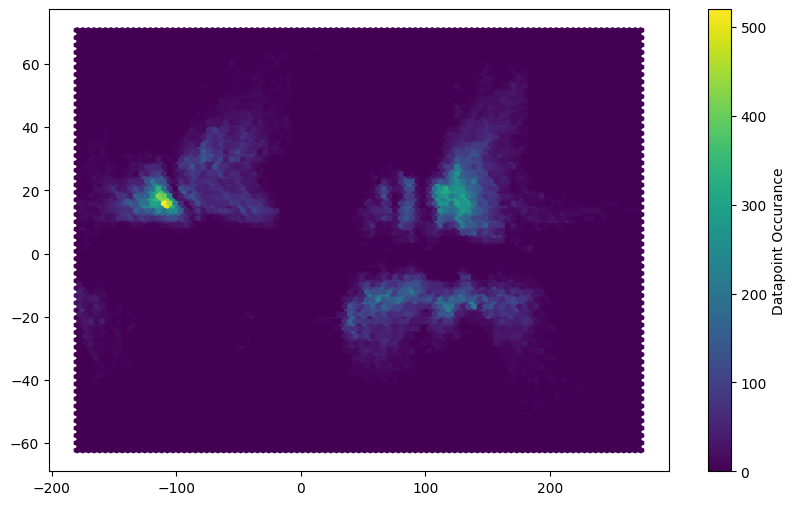

In [20]:
#10 
## MM Comments: Using mincount gets rid of all data that doesn't exist, this 
## isn't an issue, but in the future think about what you're trying to represent
plt.figure(figsize=(10, 6))
plt.hexbin(df['LON'], df['LAT'], gridsize=100, cmap='viridis')
##df.plot.hexbin(x = 'LON', y = 'LAT', gridsize = 100)
colorbar = plt.colorbar(label='Datapoint Occurance')
#plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Datapoint Frequency')

<Axes: title={'center': 'Datapoint Frequnecy per Year'}, xlabel='Year', ylabel='Datapoint Frequency'>

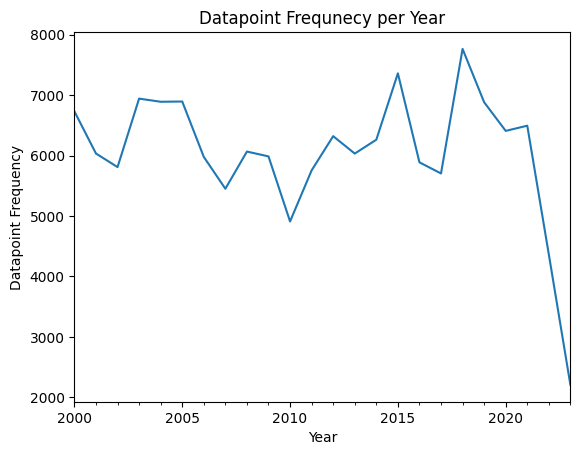

In [23]:
#11
## MM Comment: Wanted you to use a plot line!
yr_cnt = df.resample('Y').size()
yr_cnt.plot(kind='line',xlabel='Year',ylabel='Datapoint Frequency',title='Datapoint Frequnecy per Year')

<Axes: title={'center': 'Climatology of Average Daily Wind Speed (2000-2023)'}, xlabel='Day', ylabel='Average Wind Speed'>

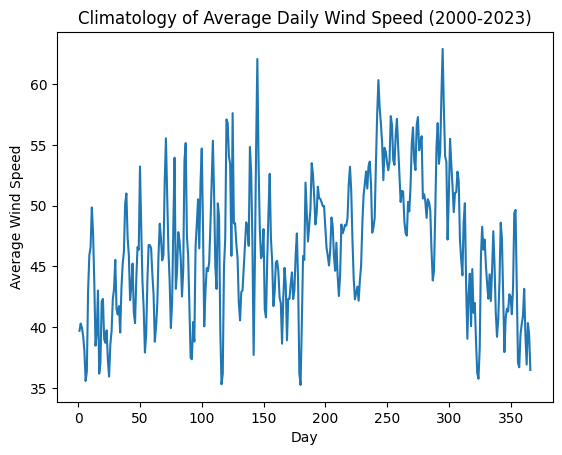

In [24]:
#12

## We wanted you to plot the climatology of the datapoint counts, not the wind speed (-0.25)
df['DayOfYear'] = df.index.dayofyear
climatology = df.groupby('DayOfYear')['WIND'].mean()
climatology.plot(kind='line',xlabel='Day',ylabel='Average Wind Speed',title='Climatology of Average Daily Wind Speed (2000-2023)')

In [25]:
len(climatology)

366